In [1]:
pip install gym

In [2]:
import gym
import random
import numpy as np

# Importing the Environment from the API

In [21]:
env = gym.make("FrozenLake-v1", new_step_api=True, render_mode='rgb_array')

In [4]:
action_size = env.action_space.n
state_size = env.observation_space.n

qtable = np.zeros((state_size,action_size))
print(qtable)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


# Training the Model

In [5]:
total_episodes = 15000        # Total episodes
learning_rate = 0.8           # Learning rate
max_steps = 99                # Max steps per episode
gamma = 0.95                  # Discounting rate

# Exploration parameters
epsilon = 1.0                 # Exploration rate
max_epsilon = 1.0             # Exploration probability at start
min_epsilon = 0.01            # Minimum exploration probability
decay_rate = 0.005             # Exponential decay rate for exploration prob

In [9]:
# List of rewards
rewards = []

# 2 For life or until learning is stopped
for episode in range(total_episodes):
    # Reset the environment
    state = env.reset()
    step = 0
    done = False
    total_rewards = 0

    for step in range(max_steps):
        # 3. Choose an action a in the current world state (s)
        ## First we randomize a number
        exp_exp_tradeoff = random.uniform(0, 1)

        ## If this number > greater than epsilon --> exploitation (taking the biggest Q value for this state)
        if exp_exp_tradeoff > epsilon:
            action = np.argmax(qtable[state,:])

        # Else doing a random choice --> exploration
        else:
            action = env.action_space.sample()

        # Take the action (a) and observe the outcome state(s') and reward (r)
        # new_state, reward, done, info = env.step(action) # Old way with 4 values
        new_state, reward, terminated, truncated, info = env.step(action) # New way with 5 values


        # Update Q(s,a):= Q(s,a) + lr [R(s,a) + gamma * max Q(s',a') - Q(s,a)]
        # qtable[new_state,:] : all the actions we can take from new state
        # If the episode is done, the max Q value for the new state should be 0
        qtable[state, action] = qtable[state, action] + learning_rate * (reward + gamma * np.max(qtable[new_state, :]) * (1 - (terminated or truncated)) - qtable[state, action])


        total_rewards += reward

        # Our new state is state
        state = new_state

        # If done (if we're dead) : finish episode
        if terminated or truncated:
            break

    # Reduce epsilon (because we need less and less exploration)
    epsilon = min_epsilon + (max_epsilon - min_epsilon)*np.exp(-decay_rate*episode)
    rewards.append(total_rewards)

print ("Score over time: " +  str(sum(rewards)/total_episodes))
print(qtable)

Score over time: 0.47846666666666665
[[1.05191615e-02 1.13927794e-02 1.11226936e-02 1.11061670e-02]
 [1.28749209e-03 3.71785913e-03 4.85303523e-03 1.20885370e-02]
 [6.53754346e-03 4.05599408e-03 4.43568046e-03 9.93190510e-03]
 [4.94558027e-03 6.12592587e-03 5.62259444e-03 1.14566762e-02]
 [2.82739271e-01 7.65611053e-03 6.63577668e-03 1.36735090e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.16408388e-01 1.67132706e-04 5.60102500e-05 2.57296246e-05]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [9.59350218e-03 5.33402004e-03 1.07449967e-02 1.94887125e-01]
 [9.09715191e-03 6.12955259e-01 9.27900837e-03 4.14940773e-03]
 [7.85054346e-01 6.07518863e-03 9.00612705e-04 1.59876830e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.90080272e-02 8.01288017e-02 3.99946816e-01 1.14824589e-01]
 [1.92432530e-01 9.98535084e-01 3.90935327e-01 1.91403753e-01]
 [0.00000000e+00 0

In [15]:
reset_output = env.reset()
print(type(reset_output))
print(reset_output)

<class 'int'>
0


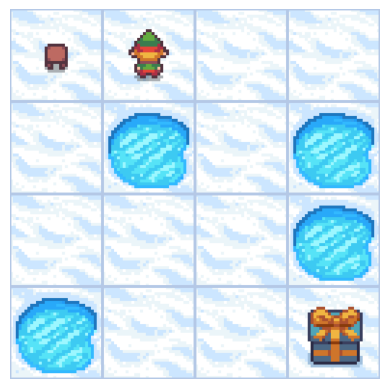

In [24]:
import matplotlib.pyplot as plt
from IPython import display
import numpy as np # Import numpy

# Set render_mode to 'rgb_array' for visualization
# env = gym.make("FrozenLake-v1", new_step_api=True, render_mode='rgb_array') # Moved to cell pcicOiLxbmub

for episode in range(1): # Visualize only one episode
    state = env.reset()
    step = 0
    done = False
    print("****************************************************")
    print("EPISODE ", episode)

    for step in range(max_steps):
        action = np.argmax(qtable[state,:])
        new_state, reward, terminated, truncated, info = env.step(action)
        done = terminated or truncated

        # Render the environment to an array and display it
        img = env.render()

        # Check if the output is a list and get the first element if it is
        if isinstance(img, list):
            img = img[0]

        # Check if the image is a numpy array before checking shape
        if isinstance(img, np.ndarray):
             # Select the first image from the batch if the shape is unexpected
            if img.shape[0] == 2 and img.shape[1:] == (256, 256, 3):
                img = img[0]


        plt.imshow(img)
        plt.axis('off')
        display.display(plt.gcf())
        display.clear_output(wait=True)


        if done:
            print("Number of steps", step)
            break
        state = new_state
env.close()